In [89]:
# Carry Trade Strategy using Perpetual Futures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from src.data.get_data import load_data

df_btc = load_data("BTCUSDT")
df_eth = load_data("ETHUSDT")

In [20]:
df_btc

,timestamp,fundingRate,closePrice
0,2019-09-10 08:00:00.000,0.000100,10098.15
1,2019-09-10 16:00:00.000,0.000100,10098.15
2,2019-09-11 00:00:00.000,0.000100,10158.33
3,2019-09-11 08:00:00.000,0.000100,10158.33
4,2019-09-11 16:00:00.000,0.000100,10158.33
...,...,...,...
6134,2025-04-16 00:00:00.000,0.000024,84030.38
6135,2025-04-16 08:00:00.000,0.000069,84030.38
6136,2025-04-16 16:00:00.000,0.000020,84030.38
6137,2025-04-17 00:00:00.001,0.000014,84383.51


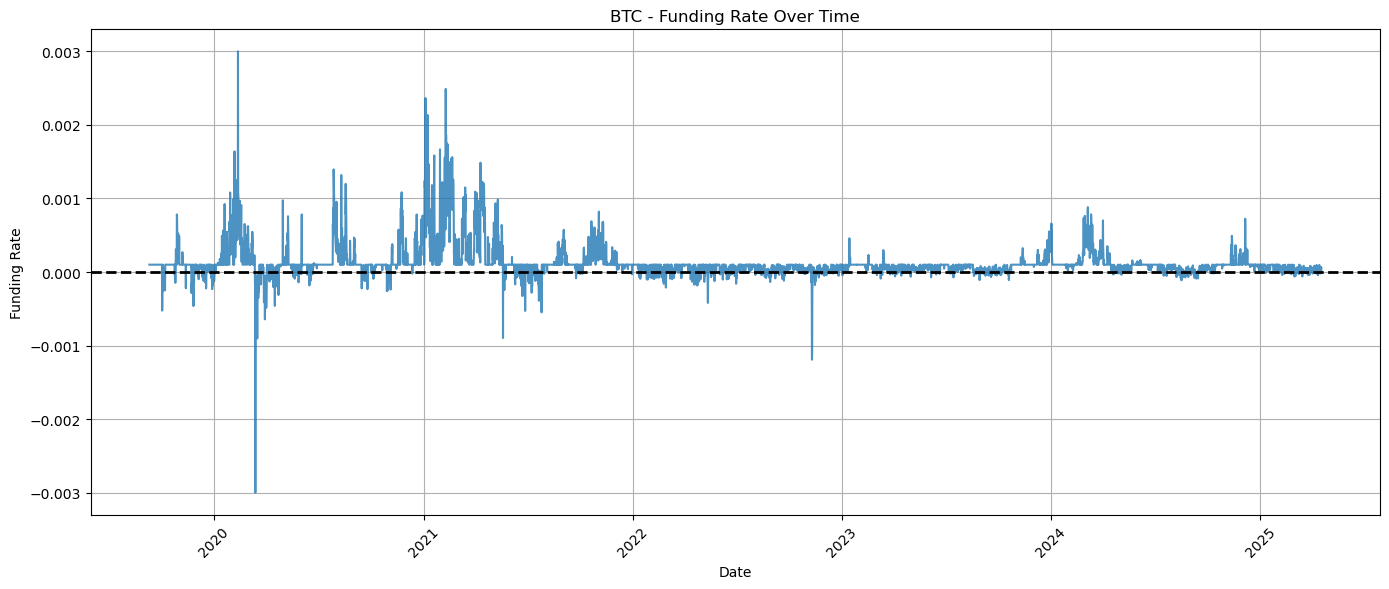

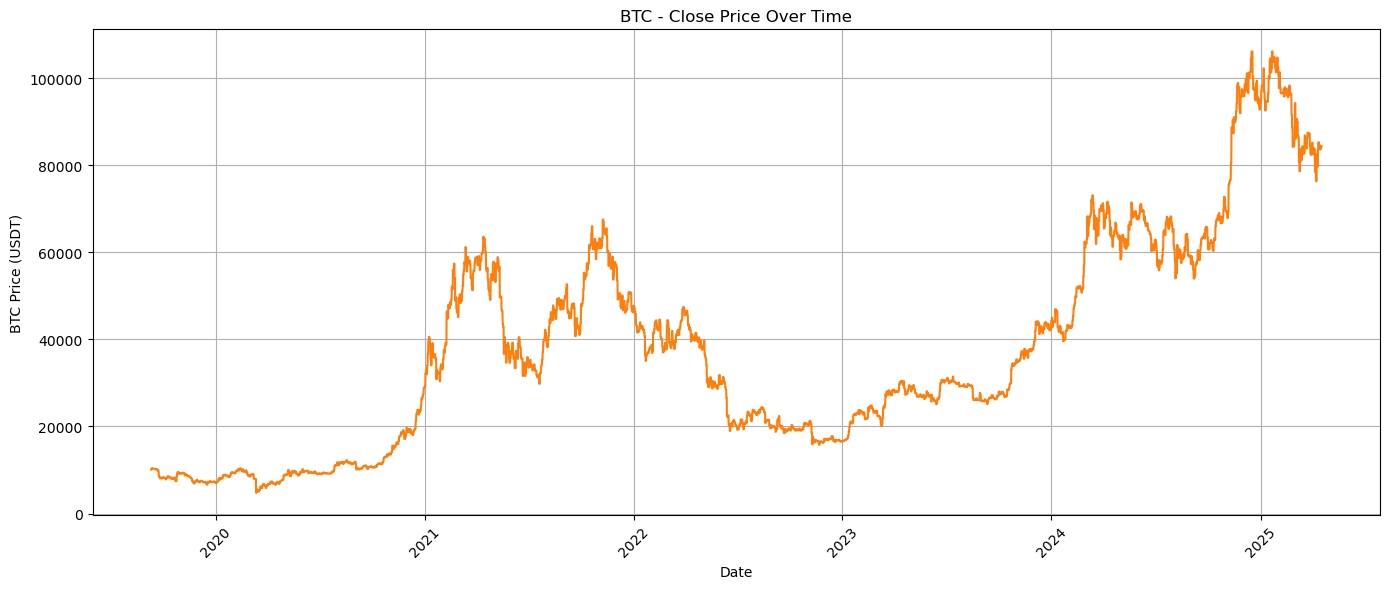

Saved plots to:
 - data/images/BTC_funding_rate.png
 - data/images/BTC_close_price.png


In [66]:
from src.utils.plot_data import plot_funding_and_price

plot_funding_and_price(df_btc, 'BTC')

In [67]:
df_eth

,timestamp,fundingRate,closePrice,fundingPnL,cumulativeFundingPnL,cumulativeReturnPct
0,2019-11-27 08:00:00.000,0.000100,152.62,0.000100,0.000100,0.000066
1,2019-11-27 16:00:00.000,0.000100,152.62,0.000100,0.000200,0.000131
2,2019-11-28 00:00:00.000,0.000100,150.72,0.000100,0.000300,0.000197
3,2019-11-28 08:00:00.000,0.000014,150.72,0.000014,0.000314,0.000206
4,2019-11-28 16:00:00.000,-0.000106,150.72,-0.000106,0.000208,0.000136
...,...,...,...,...,...,...
5900,2025-04-16 00:00:00.000,0.000043,1577.14,0.000043,0.892484,0.584775
5901,2025-04-16 08:00:00.000,-0.000030,1577.14,-0.000030,0.892454,0.584756
5902,2025-04-16 16:00:00.000,-0.000025,1577.14,-0.000025,0.892429,0.584739
5903,2025-04-17 00:00:00.001,0.000045,1594.49,0.000045,0.892474,0.584769


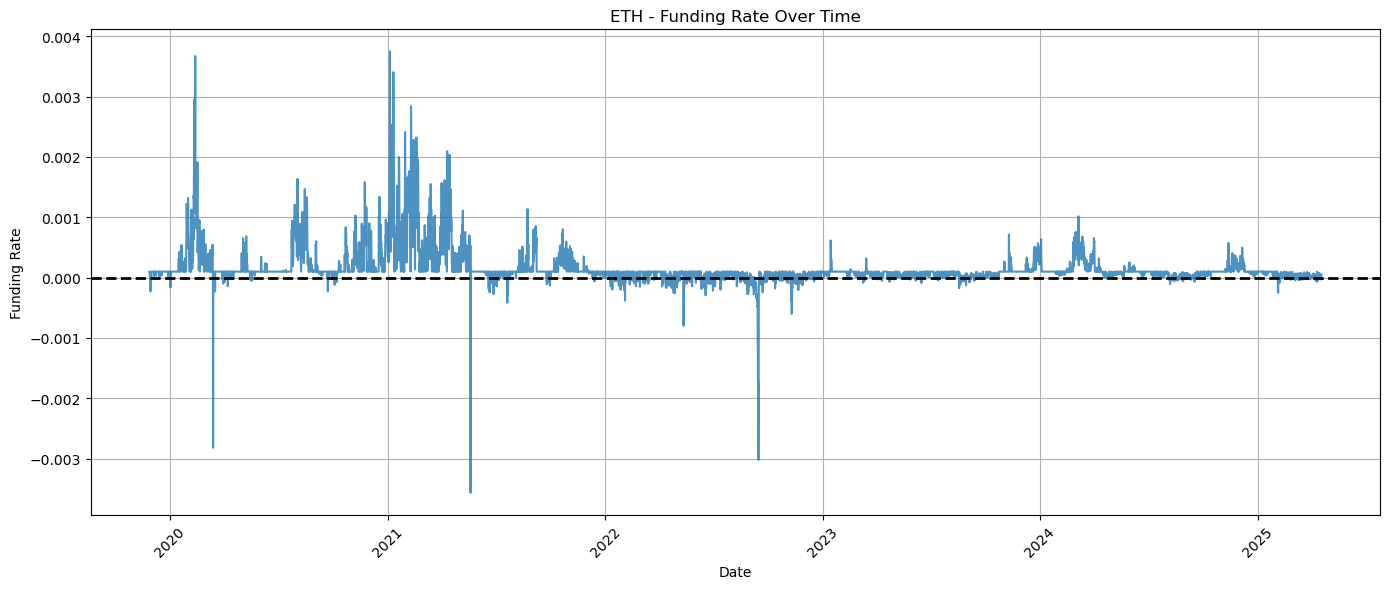

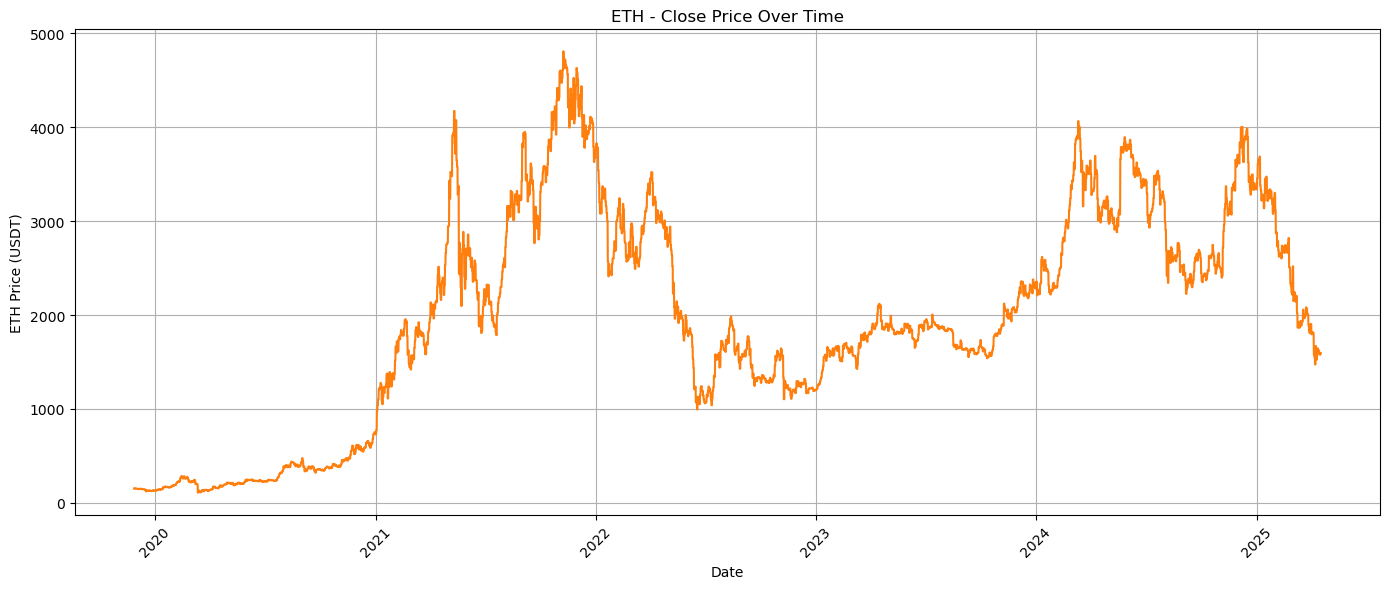

Saved plots to:
 - data/images/ETH_funding_rate.png
 - data/images/ETH_close_price.png


In [68]:
plot_funding_and_price(df_eth, 'ETH')

In [ ]:
from src.data.get_data import compute_funding_performance

# Define position size (e.g., 1 unit of asset)
position_size = 1

# BTC
df_btc = compute_funding_performance(df_btc, position_size)

# ETH
df_eth = compute_funding_performance(df_eth, position_size)


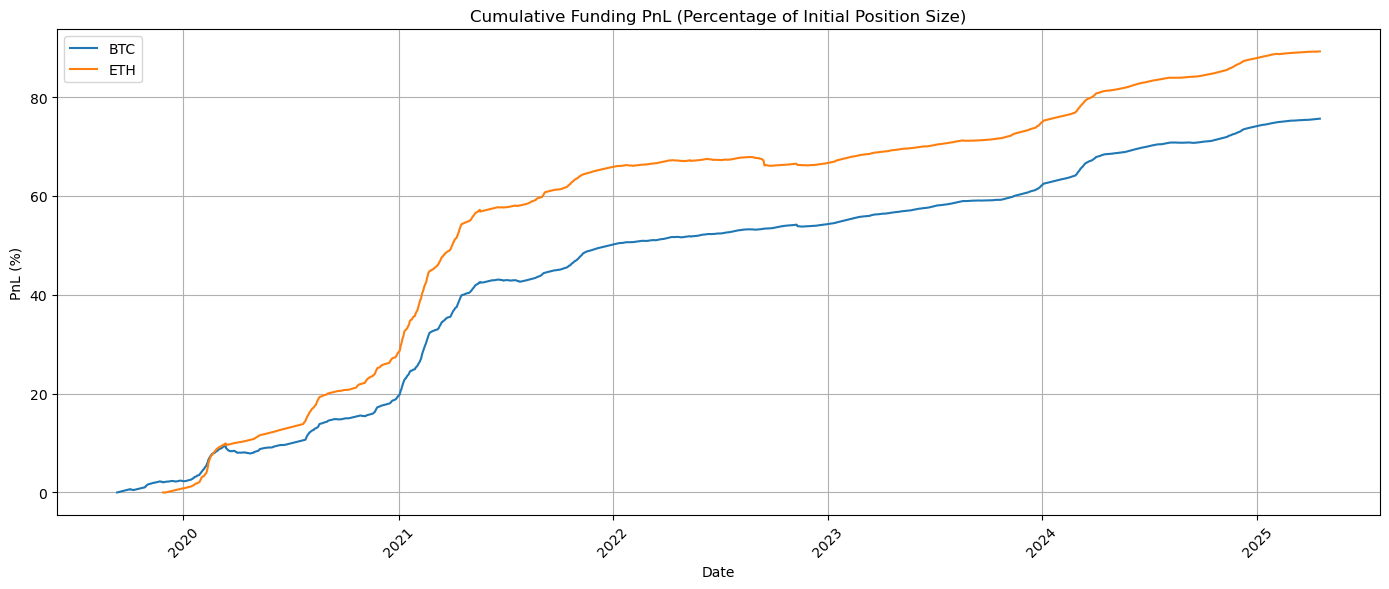

Saved cumulative PnL plot to: data/images/cumulative_funding_pnl.png


In [76]:
from src.utils.plot_data import plot_cumulative_funding_pnl

dfs = {
    'BTC': df_btc,
    'ETH': df_eth
}

plot_cumulative_funding_pnl(dfs)

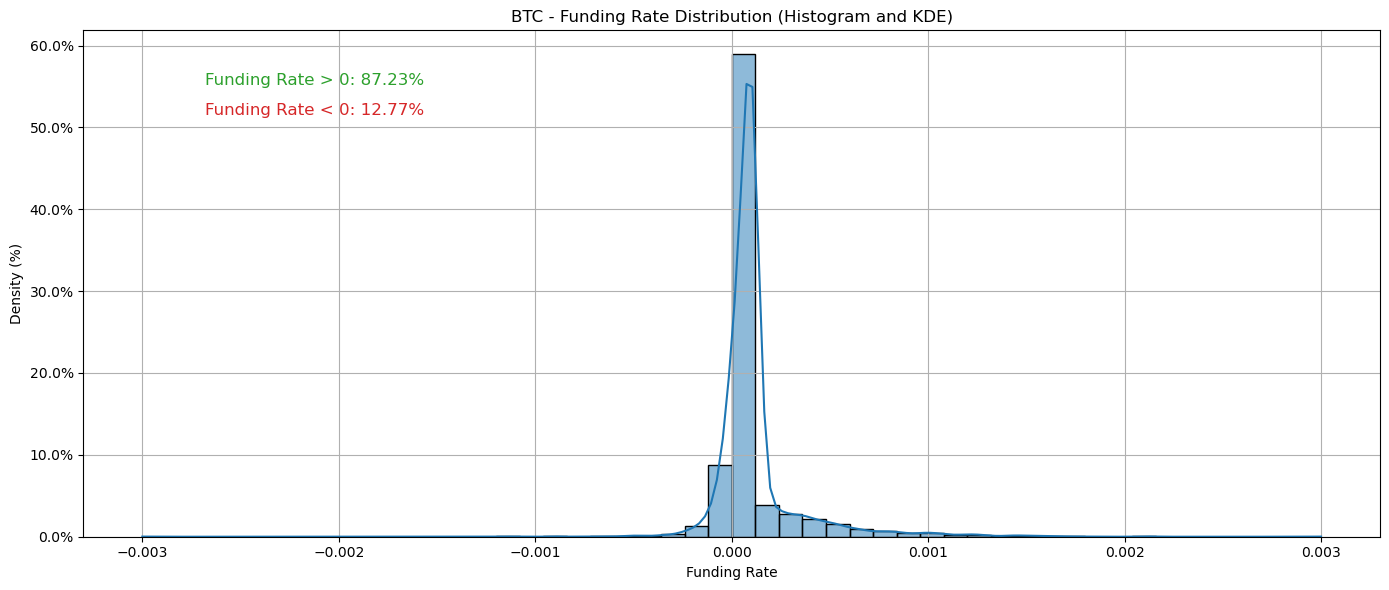

Funding Rate > 0: 87.23%
Funding Rate < 0: 12.77%
Saved plot to: data/images/BTC_funding_rate_distribution.png


In [71]:
from src.utils.plot_data import plot_funding_rate_distribution

plot_funding_rate_distribution(df_btc, 'BTC')

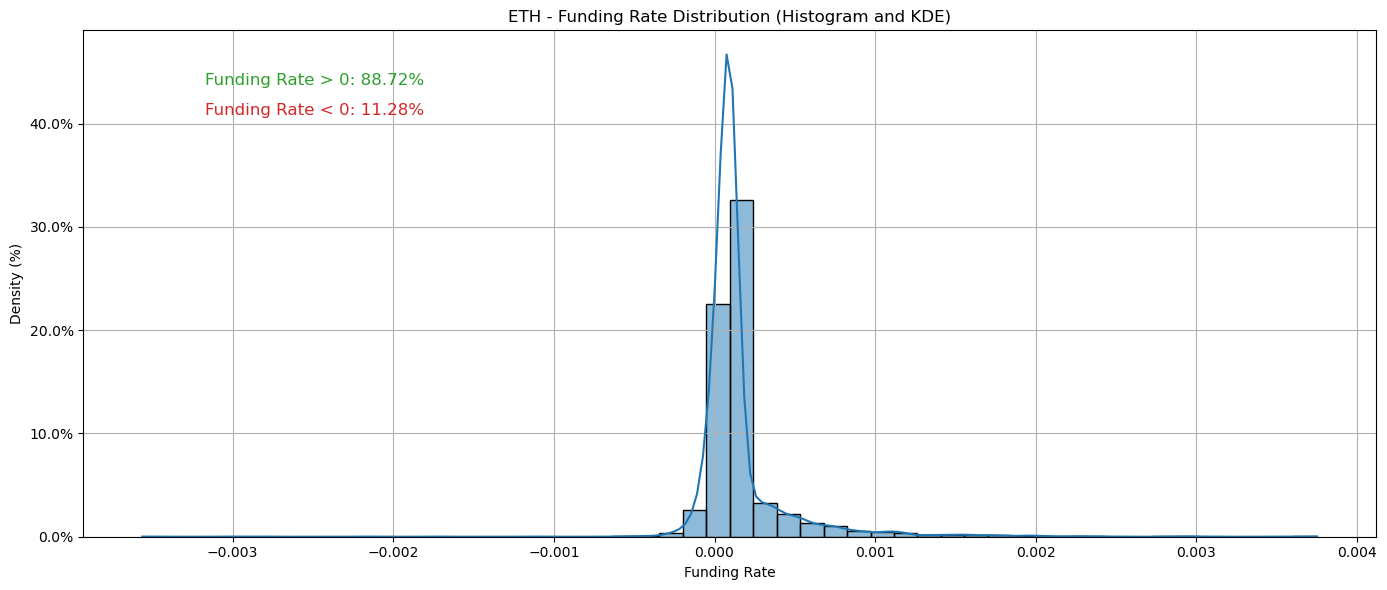

Funding Rate > 0: 88.72%
Funding Rate < 0: 11.28%
Saved plot to: data/images/ETH_funding_rate_distribution.png


In [72]:
plot_funding_rate_distribution(df_eth, 'ETH')

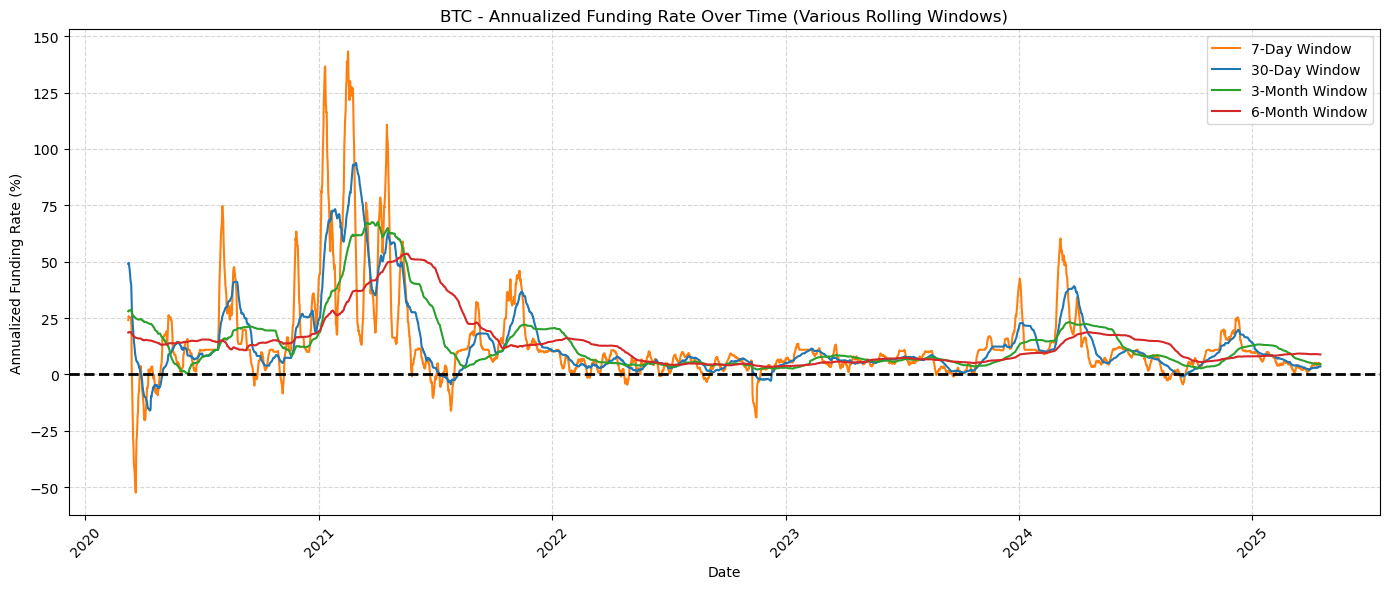

Saved plot to: data/images/BTC_funding_rate_rolling.png


In [79]:
from src.utils.plot_data import plot_annualized_funding_rate

plot_annualized_funding_rate(df_btc, 'BTC')

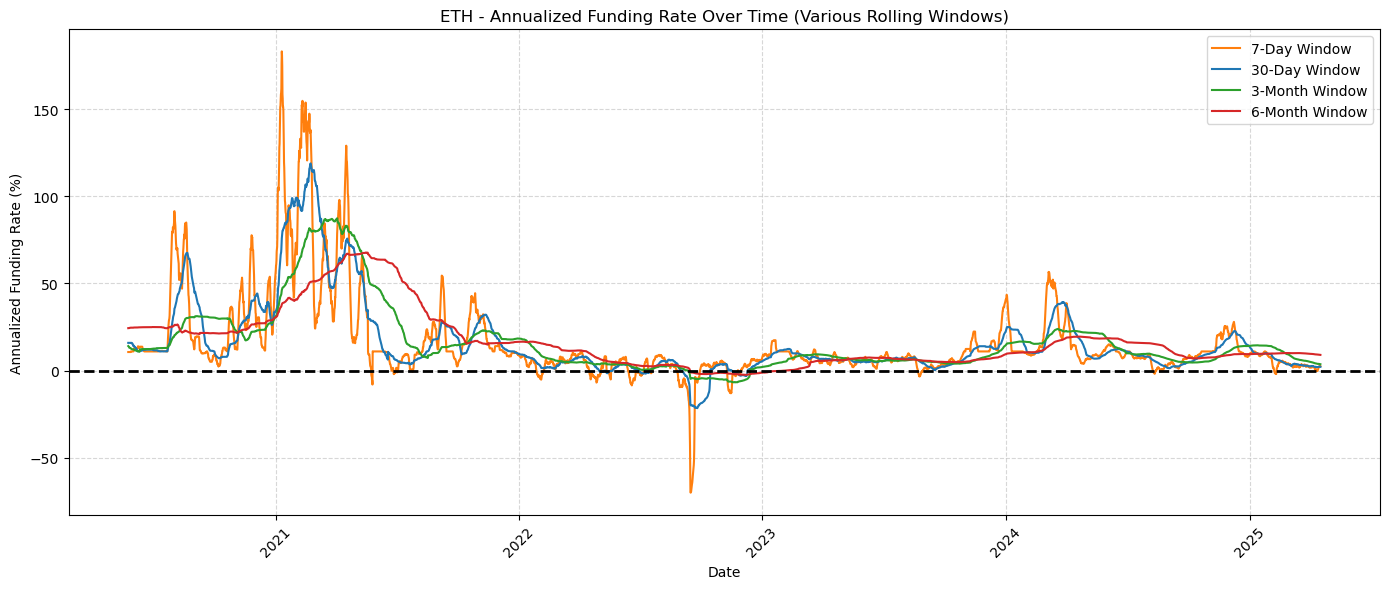

Saved plot to: data/images/ETH_funding_rate_rolling.png


In [80]:
plot_annualized_funding_rate(df_eth, 'ETH')

In [94]:
from src.data.get_data import save_dune_query_to_csv, load_csv_to_df

# Load .env variables
load_dotenv()

QUERY_ID = 570874
LIDO_ETH_APR_CSV_PATH = "data/lido_eth_apr_history.csv"

# Save data to CSV
save_dune_query_to_csv(DUNE_API_KEY, QUERY_ID, LIDO_ETH_APR_CSV_PATH)

2025-04-17 20:25:28,668 INFO dune_client.api.base executing 570874 on medium cluster
2025-04-17 20:25:29,249 INFO dune_client.api.base waiting for query execution 01JS2FZBKQS1N0N92Y474Z2W0Z to complete: ExecutionState.PENDING (queue position: 3)
2025-04-17 20:25:30,349 INFO dune_client.api.base waiting for query execution 01JS2FZBKQS1N0N92Y474Z2W0Z to complete: ExecutionState.EXECUTING
2025-04-17 20:25:31,497 INFO dune_client.api.base waiting for query execution 01JS2FZBKQS1N0N92Y474Z2W0Z to complete: ExecutionState.EXECUTING


✅ Results saved to data/lido_eth_apr_history.csv


In [96]:
from src.data.get_data import load_csv_to_df

df_lido_apr = load_csv_to_df(LIDO_ETH_APR_CSV_PATH)
df_lido_apr

📂 Loaded 958 rows from data/lido_eth_apr_history.csv


,Lido staking APR(instant),Lido staking APR(ma_30),Lido staking APR(ma_7),protocol APR(ma_7),protocol_apr,time
0,2.785843,3.008087,2.901742,3.224158,3.095381,2025-04-17 12:23:59+00:00
1,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47+00:00
2,2.830437,3.003347,3.045377,3.383752,3.144930,2025-04-15 12:21:59+00:00
3,2.974651,2.999421,3.086773,3.429748,3.305168,2025-04-14 12:26:11+00:00
4,2.841712,2.993354,3.711069,4.123410,3.157458,2025-04-13 12:24:59+00:00
...,...,...,...,...,...,...
953,3.881250,3.881875,3.881875,4.313194,4.312500,2022-09-05 12:22:07+00:00
954,3.882292,3.882031,3.882031,4.313368,4.313657,2022-09-04 12:18:25+00:00
955,3.873958,3.881944,3.881944,4.313272,4.304398,2022-09-03 12:23:50+00:00
956,3.884375,3.885937,3.885937,4.317708,4.315972,2022-09-02 12:24:24+00:00


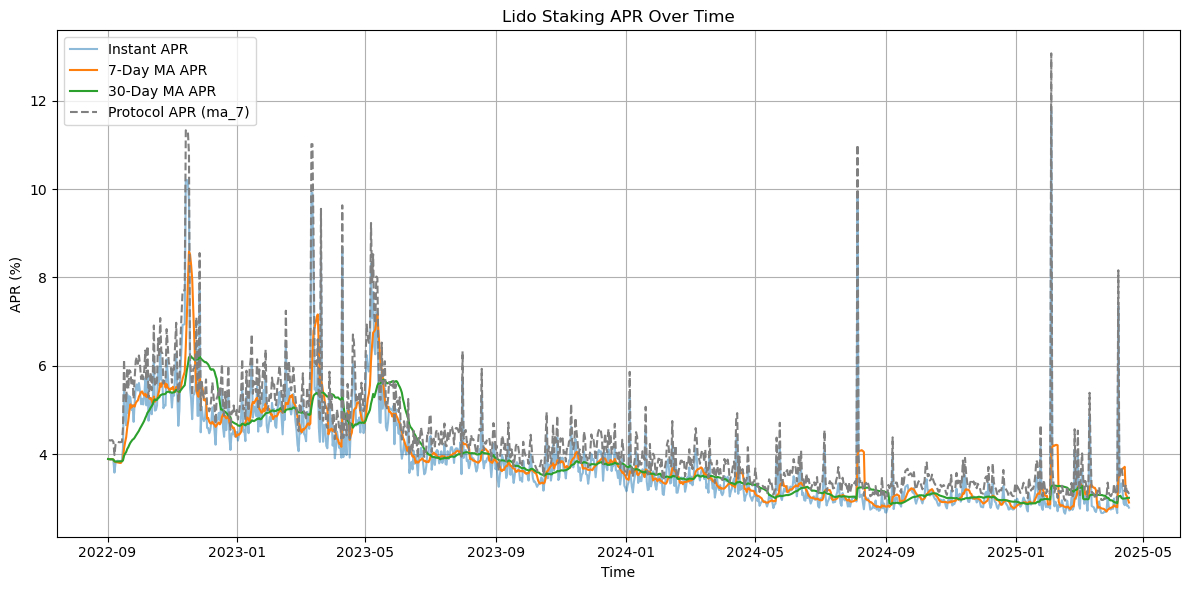

In [97]:
from src.utils.plot_data import plot_lido_apr

plot_lido_apr(df_lido_apr)

In [111]:
from src.data.get_data import merge_funding_rates_and_apr_data

df_merged_eth = merge_funding_rates_and_apr_data(df_eth, df_lido_apr)
df_merged_eth

,timestamp,fundingRate,closePrice,fundingPnL,cumulativeFundingPnL,cumulativeReturnPct,cumulativeFundingPnL_pct,date_x,Lido staking APR(instant),Lido staking APR(ma_30),Lido staking APR(ma_7),protocol APR(ma_7),protocol_apr,time,date_y,cumulativeFundingAPRPnL
0,2022-09-01 00:00:00.012,-0.000013,1586.16,-0.000013,0.676972,0.443567,67.687247,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564472
1,2022-09-01 08:00:00.000,0.000009,1586.16,0.000009,0.676982,0.443573,67.688165,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564482
2,2022-09-01 16:00:00.013,-0.000080,1586.16,-0.000080,0.676902,0.443521,67.680167,2022-09-01,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564402
3,2022-09-02 00:00:00.002,0.000055,1575.35,0.000055,0.676956,0.443557,67.685636,2022-09-02,3.887500,3.887500,3.887500,4.319444,4.319444,2022-09-01 12:25:18,2022-09-01,4.564456
4,2022-09-02 08:00:00.013,0.000033,1575.35,0.000033,0.676989,0.443578,67.688927,2022-09-02,3.884375,3.885937,3.885937,4.317708,4.315972,2022-09-02 12:24:24,2022-09-02,4.561364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2025-04-16 00:00:00.000,0.000043,1577.14,0.000043,0.892484,0.584775,89.238395,2025-04-16,2.830437,3.003347,3.045377,3.383752,3.144930,2025-04-15 12:21:59,2025-04-15,3.722921
2869,2025-04-16 08:00:00.000,-0.000030,1577.14,-0.000030,0.892454,0.584756,89.235435,2025-04-16,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727343
2870,2025-04-16 16:00:00.000,-0.000025,1577.14,-0.000025,0.892429,0.584739,89.232921,2025-04-16,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727318
2871,2025-04-17 00:00:00.001,0.000045,1594.49,0.000045,0.892474,0.584769,89.237400,2025-04-17,2.834889,3.008296,2.980213,3.311347,3.149877,2025-04-16 12:24:47,2025-04-16,3.727363


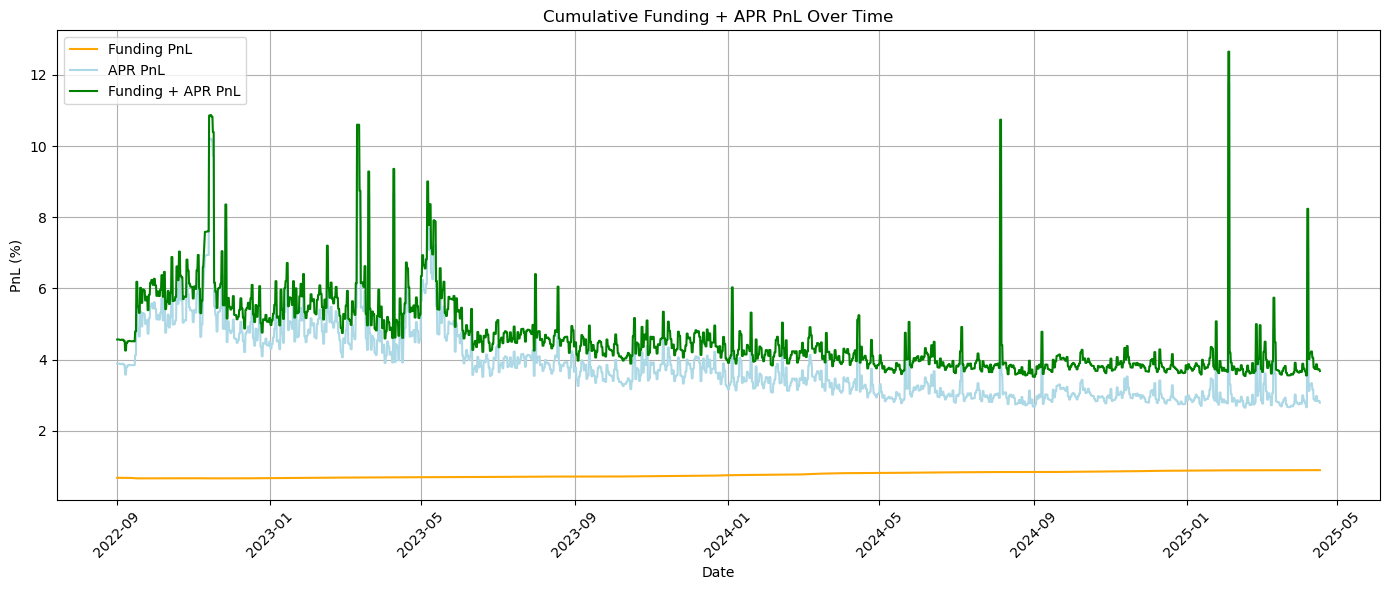

Saved cumulative Funding + APR PnL plot to: data/images/cumulative_funding_apr_pnl.png


In [ ]:
from src.utils.plot_data import plot_cumulative_funding_apr_pnl

plot_cumulative_funding_apr_pnl(df_merged_eth)

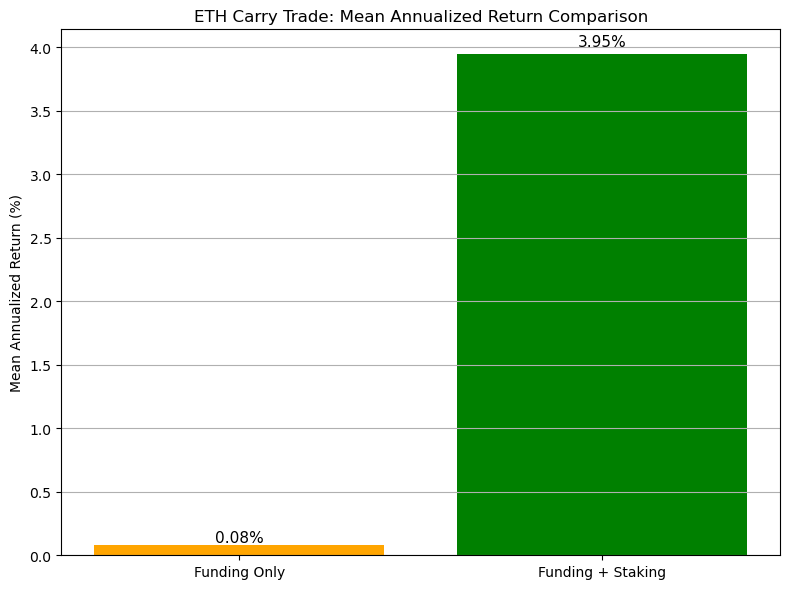

Saved bar chart comparing annualized returns to: data/images/annualized_return_comparison.png


In [112]:
from src.utils.plot_data import plot_annualized_return_comparison

plot_annualized_return_comparison(df_merged_eth)